# Machine Learning
- loading dataset and applying preprocessing
- Training multiple ML models
    - Looking at metrics for comparison of models
- Hyperparameter training on best model
- Creating submission file (csv) for Kaggle Challenge

# Loading Dataset
- Using preprocess_data.py

In [1]:
#importing module that wraps preprocessing steps
import Churn_Preprocess as cp

In [2]:
#reimport if necessary (edit file after already imported)
import importlib
importlib.reload(cp)

<module 'Churn_Preprocess' from '/Users/Temp/Data3402/Kaggle/Churn_Preprocess.py'>

In [3]:
#loading the dataset/applying preprocessing
df=cp.load_preprocess_data('train.csv')

In [4]:
#checking dataset
df

,CreditScore,Age,Balance,EstimatedSalary,Age/Tenure,Balance/Tenure,Balance/Age,0,1,2,...,15,16,17,18,19,20,21,22,23,Exited
0,0.568720,0.384615,0.000000,0.907279,0.192982,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
1,0.471564,0.384615,0.000000,0.247483,0.578947,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,0.592417,0.564103,0.000000,0.924364,0.070175,0.000000,0.000000,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,0.362559,0.410256,0.593398,0.422787,0.298246,0.336028,0.424012,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
4,0.682464,0.384615,0.000000,0.075293,0.115789,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.566351,0.384615,0.000000,0.659179,0.289474,0.000000,0.000000,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
165030,0.862559,0.435897,0.000000,0.659177,0.204678,0.000000,0.000000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
165031,0.324645,0.333333,0.000000,0.637151,0.108772,0.000000,0.000000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
165032,0.298578,0.307692,0.643819,0.355841,0.075188,0.104166,0.521378,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


# Models

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [7]:
#choosing ML algorithms for testing
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Decision Tree",
    "Random Forest",
]

#creating classifier instances for each ML alg
classifier_instances = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, 
                           max_features=1, random_state=42),
]

#creating dictionary of classifier name and instance
classifiers = dict(zip(names,classifier_instances))

In [8]:
# iterate over datasets
import sys

def fit_all(dataset,classifiers, max_cls=None):
    scores = dict()
    # preprocess dataset, split into training and test part
    X = dataset.iloc[:,:-1] #excluding target var
    y = dataset.iloc[:,-1:] #only target var
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

    # iterate over classifiers
    for cls_cnt,(cls_name, clf) in enumerate(classifiers.items()):
        print(cls_cnt,"Running classifier",cls_name,"on dataset",". N_Train = ",X_train.shape[0] )
        sys.stdout.flush()
        clf_0 = make_pipeline(StandardScaler(), clf)
        clf_0.fit(X_train.to_numpy(), y_train.to_numpy().reshape((len(y_train),)))
        score = clf.score(X_test.to_numpy(), y_test.to_numpy())

        scores[cls_name]=dict()
        scores[cls_name]['Score'] = score
        scores[cls_name]['Accuracy']=accuracy_score(y_test.to_numpy(),clf_0.predict(X_test.to_numpy()))
        scores[cls_name]['Precision']=precision_score(y_test.to_numpy(),clf_0.predict(X_test.to_numpy()))
        scores[cls_name]['Recall']=recall_score(y_test.to_numpy(),clf_0.predict(X_test.to_numpy()))
        scores[cls_name]['F1']=f1_score(y_test.to_numpy(),clf_0.predict(X_test.to_numpy()))
        scores[cls_name]['AUC-ROC']=roc_auc_score(y_test.to_numpy(),clf_0.predict(X_test.to_numpy()))
        if max_cls:
            if cls_cnt>max_cls:
                print("Max Classifiers Reached.")
                sys.stdout.flush()
                break


    return scores
    

In [9]:
scores = fit_all(df,classifiers,2)

0 Running classifier Nearest Neighbors on dataset . N_Train =  115523
1 Running classifier Linear SVM on dataset . N_Train =  115523
2 Running classifier Decision Tree on dataset . N_Train =  115523
3 Running classifier Random Forest on dataset . N_Train =  115523
Max Classifiers Reached.


In [10]:
from IPython.display import HTML, display
import tabulate

display(HTML(tabulate.tabulate(list(map(lambda x: [x[0]]+x[1],zip(scores.keys(),map(lambda x: list(x.values()),scores.values())))), 
                               tablefmt='html',
                               headers=[" "]+list(next(iter(scores.items()))[1].keys()))))


,Score,Accuracy,Precision,Recall,F1,AUC-ROC
Nearest Neighbors,0.788855,0.835976,0.631328,0.52274,0.571926,0.720893
Linear SVM,0.790895,0.860071,0.739717,0.512912,0.605781,0.732525
Decision Tree,0.79039,0.854457,0.748278,0.46059,0.570202,0.70975
Random Forest,0.79039,0.790754,1,0.00173444,0.00346287,0.500867


## Discussion of best metric to evaluate models
- Accuracy: Not a good metric when dataset is imbalanced like this one
- Precision: Good for when false positives are important
- Recall: Good for when false negatives are important
- F1: The harmonic mean of precisuion and recall, good for imbalanced datasets
- AUC_ROC: TPR v. FPR, good for imbalanced datasets

Due to the Churn dataset being imbalanced, Exited being minority class, F1 and AUC_ROC scores will give the best indicator as to how good the model is.

## Discussion of Results
- The Linear SVM has the best F1 and AUC_ROC scores of the models trained.
- It is interesting and concerning that the Random Forest model had a precision score of 1, indicating it perfectly was predicting the target variable.

## Hyperparameter tuning on SVC model

In [23]:
#converting
df.columns=df.columns.astype(str) 

# 'Exited' is the target variable
X = df.drop(columns=['Exited'])
y = df['Exited']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['linear']}  

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.857 total time= 5.1min
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.861 total time= 4.8min
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.859 total time= 4.9min
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.859 total time= 5.1min
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.859 total time= 4.9min
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.857 total time= 4.9min
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.861 total time= 5.0min
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.859 total time= 4.9min
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.859 total time= 4.8min
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.859 total time= 4.9min
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.857 total time= 4.8min
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;

In [28]:
# Obtaining the best performing model from the grid search results
best = grid.best_estimator_

# predictions
y_pred = best.predict(X_test)

# metrics; adding SVC hyperparameter tuning scores to existing scores dictionary
scores['SVC HPT']=dict()
scores['SVC HPT']['Score'] = best_model.score(X_test,y_test)
scores['SVC HPT']['Accuracy'] = accuracy_score(y_test, y_pred)
scores['SVC HPT']['Precision'] = precision_score(y_test, y_pred)
scores['SVC HPT']['Recall'] = recall_score(y_test, y_pred)
scores['SVC HPT']['F1'] = f1_score(y_test, y_pred)
scores['SVC HPT']['AUC-ROC'] = roc_auc_score(y_test, y_pred)

#table of metrics for previous models + SVC hyperparameter tuning
display(HTML(tabulate.tabulate(list(map(lambda x: [x[0]]+x[1],zip(scores.keys(),map(lambda x: list(x.values()),scores.values())))), 
                               tablefmt='html',
                               headers=[" "]+list(next(iter(scores.items()))[1].keys()))))

,Score,Accuracy,Precision,Recall,F1,AUC-ROC
Nearest Neighbors,0.788855,0.835976,0.631328,0.52274,0.571926,0.720893
Linear SVM,0.790895,0.860071,0.739717,0.512912,0.605781,0.732525
Decision Tree,0.79039,0.854457,0.748278,0.46059,0.570202,0.70975
Random Forest,0.79039,0.790754,1,0.00173444,0.00346287,0.500867
SVC HPT,0.865949,0.860112,0.739589,0.513394,0.606074,0.732727


# XG Boost

In [29]:
import xgboost as xgb

In [30]:
# Model Training
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
# Cross-Validation
cv_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation AUC Scores:", cv_scores)
print("Mean AUC Score:", cv_scores.mean())

Cross-Validation AUC Scores: [0.88061045 0.88152119 0.88407218 0.88075421 0.88539683]
Mean AUC Score: 0.8824709725452845


In [32]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3]
}
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.3s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.01, max_depth=4, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.01, max_depth=4, n_e

In [33]:
# Obtaining the best performing model from the grid search results
best_model = grid_search.best_estimator_

# predictions
y_pred = best_model.predict(X_test)

# metrics; adding XGBoost scores to existing scores dictionary
scores['XGBoost']=dict()
scores['XGBoost']['Score'] = best_model.score(X_test,y_test)
scores['XGBoost']['Accuracy'] = accuracy_score(y_test, y_pred)
scores['XGBoost']['Precision'] = precision_score(y_test, y_pred)
scores['XGBoost']['Recall'] = recall_score(y_test, y_pred)
scores['XGBoost']['F1'] = f1_score(y_test, y_pred)
scores['XGBoost']['AUC-ROC'] = roc_auc_score(y_test, y_pred)

#table of metrics for previous models + XGB
display(HTML(tabulate.tabulate(list(map(lambda x: [x[0]]+x[1],zip(scores.keys(),map(lambda x: list(x.values()),scores.values())))), 
                               tablefmt='html',
                               headers=[" "]+list(next(iter(scores.items()))[1].keys()))))


,Score,Accuracy,Precision,Recall,F1,AUC-ROC
Nearest Neighbors,0.788855,0.835976,0.631328,0.52274,0.571926,0.720893
Linear SVM,0.790895,0.860071,0.739717,0.512912,0.605781,0.732525
Decision Tree,0.79039,0.854457,0.748278,0.46059,0.570202,0.70975
Random Forest,0.79039,0.790754,1,0.00173444,0.00346287,0.500867
SVC HPT,0.865949,0.860112,0.739589,0.513394,0.606074,0.732727
XGBoost,0.865949,0.865949,0.74667,0.545577,0.630477,0.748244


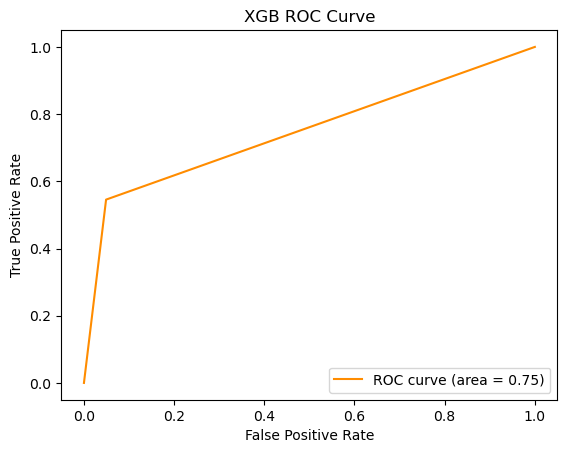

In [34]:
#ROC Curve for XGBoost
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test,y_pred)

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB ROC Curve')

plt.show()

# Comparing XGBoost to Linear SVM 
- XGBoost out performed the Linear SVM that resulted from hyperparameter tuning according to its F1 and AUC_ROC score.
- The two models had similar Precision and Recall scores, but XGBoost still had the better score of the two.

# Making submission file for Kaggle Challenge

In [147]:
import pandas as pd

#importing test dataset provided by kaggle
kaggle_test=pd.read_csv('test.csv') #need to import to get ID column
input_test=cp.testdf_prep('test.csv') #function slightly different from load_preprocess_data(); accounts for no 'Exited' column

In [148]:
#checking input_test df
input_test

,CreditScore,Age,Balance,EstimatedSalary,Age/Tenure,Balance/Tenure,Balance/Age,0,1,2,...,14,15,16,17,18,19,20,21,22,23
0,0.374408,0.128205,0.000000,0.804903,0.201754,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.604265,0.717949,0.000000,0.362723,0.403509,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.540284,0.410256,0.000000,0.694419,0.085213,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.599526,0.461538,0.000000,0.569654,0.078947,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.767773,0.512821,0.483318,0.697164,0.066667,0.057261,0.312516,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,0.336493,0.282051,0.462737,0.740451,0.072682,0.078318,0.392066,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
110019,0.348341,0.461538,0.709581,0.210871,0.157895,0.210168,0.484309,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
110020,0.672986,0.333333,0.000000,0.081387,0.271930,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
110021,0.665877,0.358974,0.000000,0.794101,0.187135,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [150]:
#using XGBoost model to predict Exited status
submission_pred = best_model.predict(input_test)
submission_pred.shape #checking that there are predictions for each customer (rows)

(110023,)

In [151]:
#turning predictions into array
submission_pred=pd.DataFrame(submission_pred,columns=['Exited'])
submission_pred

,Exited
0,0
1,1
2,0
3,0
4,0
...,...
110018,0
110019,0
110020,0
110021,0


In [152]:
#selecting ID column
kaggle_test=kaggle_test['id']
kaggle_test=pd.DataFrame(kaggle_test,columns=['id'])
kaggle_test

,id
0,165034
1,165035
2,165036
3,165037
4,165038
...,...
110018,275052
110019,275053
110020,275054
110021,275055


In [153]:
#combining ID column and Exited status predictions into one df
submission=pd.concat([kaggle_test,submission_pred],axis=1)
submission

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0
...,...,...
110018,275052,0
110019,275053,0
110020,275054,0
110021,275055,0


In [154]:
#creating submission file (csv file)
submission.to_csv("churn_submission.csv", index=False)